<h2>🧮 Sharpe Ratio vs Sortino Ratio</h2>


<h5>
O <b>Sharpe Ratio</b> e o <b>Sortino Ratio</b> são métricas utilizadas para avaliar o desempenho de um investimento em relação ao risco assumido.<br><br>
<b>Sharpe Ratio:</b> considera toda a volatilidade dos retornos (tanto positiva quanto negativa). Ele mostra quanto retorno excedente o portfólio gera por unidade de risco total.<br><br>
<b>Sortino Ratio:</b> leva em conta apenas a volatilidade negativa, ou seja, penaliza apenas os retornos abaixo da meta ou da taxa livre de risco.<br><br>

Em resumo, enquanto o <b>Sharpe</b> mede o risco total, o <b>Sortino</b> foca apenas no risco de perdas, sendo uma métrica mais justa quando o investidor se preocupa apenas com quedas no rendimento.
</h5>



$\textbf{Sharpe ratio} = \frac{R_{p}-R_{f}}{{\sigma_{p}}}$

onde:<br>
$R_{p}$ = retorno da carteira (ou ação)<br>
$R_{f}$ = taxa livre de risco<br>
$\sigma_{p}$ = desvio padrão dos retornos<br>


$\textbf{Sortino ratio} = \frac{R_{p}-R_{f}}{{\sigma_{p}}}$

onde:<br>
$R_{p}$ = retorno da carteira (ou ação)<br>
$R_{f}$ = taxa livre de risco<br>
$\sigma_{p}$ = desvio padrão dos retornos negativos<br>


Importando as bibliotecas

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import quantstats as qs
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

<h4>Dados de criptomoedas<h4>

Sharpe e sortino são correlacionados?

dados de BTC-USD

In [12]:
df_btc = yf.download('BTC-USD', start='2018-01-01')[['Close']]
df_btc.columns = ['Close']
df_btc.head()

C:\Users\Gustavo Santos\AppData\Local\Temp\ipykernel_16900\58575838.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_btc = yf.download('BTC-USD', start='2018-01-01')[['Close']]
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Close
Date,
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195
2018-01-05,17429.500000


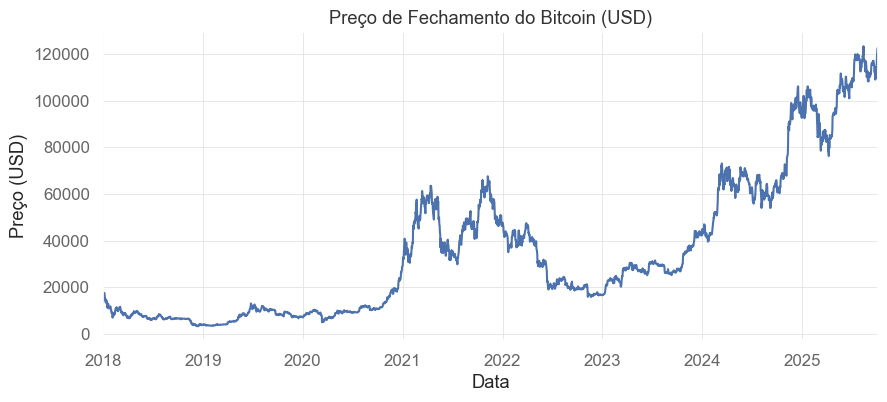

In [13]:
df_btc['Close'].plot(figsize=(10, 4), title='Preço de Fechamento do Bitcoin (USD)')
plt.ylabel('Preço (USD)')
plt.xlabel('Data')
plt.grid(True)
plt.show()

Para analisar a variação dos índices, utilizamos a função rolling da biblioteca quantstats, que opera de forma similar à biblioteca pandas, considerando uma janela móvel de um semestre (126 dias).

Aqui, calculamos os ratios Sharpe e Sortino, adotando uma taxa livre de risco baseada na Selic de 5% ao ano.

In [16]:
sharpe_qs = pd.Series(qs.stats.rolling_sharpe(df_btc['Close'], rf = 0.05).values)
sortino_qs = pd.Series(qs.stats.rolling_sortino(df_btc['Close'], rf = 0.05).values)
sharpe_qs.index = df_btc.index
sortino_qs.index = df_btc.index

Vamso ver a correlação entre esses dois índices

In [19]:
fig_corr = go.Figure()

fig_corr.add_trace({
    'type': 'scatter',
    'x': sharpe_qs,
    'y': sortino_qs,
    'mode': 'markers',
    'line': {'color': 'blue'}
})

fig_corr.update_layout(
    template='simple_white',
    paper_bgcolor="#f7f8fa",
    margin=dict(l=70, r=20, t=20, b=70),
    xaxis_title='<b>Sharpe',
    yaxis_title='<b>Sortino',
    width=500,
    height=500
)


###  Correlação entre Sharpe e Sortino

A correlação entre os índices de **Sharpe** e **Sortino** é **quase perfeita**, indicando que ambos se movimentam na mesma direção.  
Quando o índice de **Sortino** aumenta (melhor desempenho ajustado ao risco de quedas), o índice de **Sharpe** também tende a aumentar.  
Isso mostra que as duas métricas avaliam o **equilíbrio entre retorno e risco** de forma muito semelhante, embora o Sortino seja mais sensível apenas às perdas.


In [20]:
corr, p = stats.pearsonr(sharpe_qs.dropna(), sortino_qs.dropna())
print('Correlação de Pearson, r=%.3f' %corr, 'p=%.3f' %p)

Correlação de Pearson, r=0.990 p=0.000


###  Correlação de Pearson entre Sharpe e Sortino

A correlação de **Pearson** mede o grau de relação linear entre duas variáveis.  
Neste caso, comparamos os índices de **Sharpe** e **Sortino**.  
Um valor de correlação próximo de **1** indica uma **forte relação positiva**, ou seja, quando um aumenta, o outro também tende a aumentar.


###  Com uma correlação tão alta de Sharpe e Sortino, seria possível tirar algum insight disso?

In [26]:
fig  =  make_subplots(specs = [[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x = sharpe_qs.index, y  = sharpe_qs, name = 'Sharpe',line = dict(color = 'blue', width = 2)),
              secondary_y=False)

fig.add_trace(go.Scatter(x = sortino_qs.index, y  = sortino_qs, name = 'Sortino',line = dict(color = 'red', width = 2)),
              secondary_y=False)

fig.add_trace(go.Scatter(x = df_btc.index, y = np.log(df_btc['Close']), name = 'BTC-USD', line = dict(color = 'black', width = 2)),
              secondary_y=True)

fig.update_yaxes(title_text = 'Valores ajustados ao risco', secondary_y = False)
fig.update_yaxes(title_text = 'BTC-USD ', secondary_y = True)
fig.update_layout(title='<b>Sharpe vs Sortino ratios', xaxis_title="<b>Data", legend_title="",
                  font=dict(family="Arial, Arial, Arial",size=15,color="black"), template = 'simple_white', paper_bgcolor="#f7f8fa",
                  margin=dict(l=75, r=20, t=70, b=70), legend=dict(orientation="h",yanchor="bottom",y=1,xanchor="right",x=0.4),
                  width=1000,height=500)

